In [1]:
import random
import pandas as pd
import statistics

In [2]:
#Grammar rules
# L=a^n b^m c^2n   assuming m>0 , n>0
rules ={
    "a" : ['a', 'b'],
    "b" : ['b','c'],
    "c" : ['c']
}

In [3]:
#Generates random words following a^n b^m c^l
def expand_random(start,stop):
    if len(start) == stop:
        return start
    if (rules[start[-1]] and len(start)<100) :            
        element = random.choice(rules[start[-1]])
        start = start + element
        return expand_random(start,stop)
    


    return start

In [4]:
#Generates random words following a^n b^m c^2n 
def expand_cfg(start,a_count,b_count,c_count):
    if (rules[start[-1]] and len(start)<100 and c_count < 2*a_count) : #guarantees a minimum lenght of 10 for each word while respecting the rule
        if start[-1] == 'b' and b_count < 10-3*a_count:
            element = 'b'
        elif start[-1] == 'b' and b_count == 100 -3*a_count: #guarantees a macimum lenght of 100 for each word while respecting the rule
            element ='c'
        else :
            element = random.choice(rules[start[-1]])
        start = start + element
        if element == 'a':
            a_count += 1
        elif element =='c':
            c_count += 1
        elif element =='b':
            b_count += 1

        return expand_cfg(start,a_count,b_count,c_count)


    return start
        
    

In [5]:
def gen_cfg():
    start = 'a'
    a_count = 1
    c_count = 0  
    b_count =0
    return expand_cfg(start,a_count,b_count,c_count)
    
def gen_random():
    start ='a'
    stop = random.randint(10,100)
    return expand_random(start,stop)
    
    
    

In [6]:
def count_occu(se):
    count_a=[]
    count_b=[]
    count_c=[]
    for e in se:
        count_a.append(e[0].count('a'))
        count_b.append(e[0].count('b'))
        count_c.append(e[0].count('b'))
    print("This dataset contains an average of {:.2f} a's, {:.2f} b's and {:.2f} c's over all words".format(statistics.mean(count_a), statistics.mean(count_b),statistics.mean(count_c)))

Class 1 generation

In [7]:
dict_list=[]   #words that are/are not in the language are classified as 1/0
for i in range(50000000):
    a=[gen_cfg(),1]
    dict_list.append(a)

res1 = []
[res1.append(x) for x in dict_list if x not in res1]
dict_list=res1    

In [8]:
count_occu(dict_list)

This dataset contains an average of 9.23 a's, 9.66 b's and 9.66 c's over all words


Class 0 generation

In [9]:
dict_list_b=[] 
for i in range(500):    
    b=[gen_random(),0]
    dict_list_b.append(b)
res = []
[res.append(x) for x in dict_list_b if x not in res]
dict_list_b=res

In [10]:
count_occu(dict_list_b)

This dataset contains an average of 2.20 a's, 2.13 b's and 2.13 c's over all words


In [11]:
dict_list.extend(dict_list_b)
random.shuffle(dict_list)

In [12]:
df = pd.DataFrame(dict_list, columns=['Words','Class'])

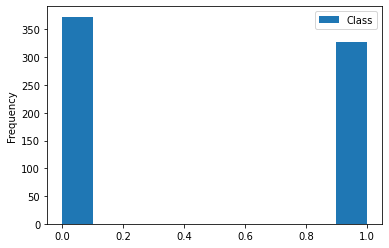

In [13]:
df.plot.hist()

In [14]:
df['Class'].value_counts()

0    373
1    327
Name: Class, dtype: int64

In [15]:
from google.colab import files

df.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>